# IMPORTING THE LIBRARIES #

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from IPython.display import Markdown, display
import json
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D


*READING THE DATA SETS*

In [3]:
df_customers = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\customers.csv')
df_events= pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\events.csv')
df_line_items = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\line_items.csv')
df_orders = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\orders.csv')
df_products = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\products.csv')
print(df_customers.head())
print()
print(df_events.head())
print()
print(df_line_items.head())
print()
print(df_orders.head())
print()
print(df_products.head())


                            customer_id                             device_id  \
0  4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf  ef424b22-2393-4708-b065-c68152e8b377   
1  5cc88463-6a08-48b5-977c-9683a1c607b2  ba53d790-0cfc-4c00-9ab7-a6b104dceb65   
2  cda7bec0-7cbf-4145-baf9-e049bab94504  33b485de-7338-4997-b1d0-b988ba17b245   
3  e7f07fd1-05af-494a-ae5a-78c405b6f9c3  428688d6-31e6-4c73-a5d0-c8e849ccf6a3   
4  873618f1-c201-4f8c-94bc-4cfc3d6d8cc8  1e939baf-c71d-444d-a832-d7dc3a6fcd0d   

                   location currency  
0                      Oman      USD  
1  United States of America      GBP  
2              Saint Helena      NGN  
3                  Djibouti      NGN  
4             Guinea-Bissau      GBP  

   event_id                           customer_id  \
0     14753  4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf   
1     14754  4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf   
2     14755  4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf   
3     14756  4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf   
4     14757  

In [52]:
df_products = df_products.rename({"id":"item_id"}, axis=1)
df_merge = df_customers.merge(df_events, on='customer_id').merge(df_orders, on='customer_id').merge(df_line_items, on='order_id').merge(df_products, on='item_id')
print('the shape of dataset:', df_merge.shape)
df_merge.head()


the shape of dataset: (578320, 15)


,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,Nike Air Max 270,129.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,Nintendo Switch,299.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,Coca-Cola 12-Pack,5.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,Adidas Ultraboost,180.00


In [53]:
df = df_merge.copy()
df.describe()


,event_id,line_item_id,item_id,quantity,price
count,578320.000000,578320.000000,578320.000000,578320.000000,578320.000000
mean,88235.379821,19034.444880,7.995741,3.009861,707.448609
std,42541.874688,9153.541683,4.322902,1.406914,972.915321
min,14786.000000,3201.000000,1.000000,1.000000,5.990000
25%,51318.000000,11108.000000,4.000000,2.000000,149.950000
50%,88373.000000,19067.000000,8.000000,3.000000,349.990000
75%,125003.000000,26960.000000,12.000000,4.000000,899.990000
max,161960.000000,34941.000000,15.000000,5.000000,3999.990000


In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  name             578320 non-null  object 
 14  price            578320 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 66.2+ MB


In [55]:
df.duplicated().sum()
df['location'].unique()


array(['Saint Helena', 'Djibouti', 'Ecuador', 'Mali', 'Grenada',
       'United States Minor Outlying Islands', 'Aruba', 'Germany',
       'Saint Pierre and Miquelon', 'Sudan', 'Palestinian Territory',
       'North Macedonia', 'Qatar', 'Israel', 'Netherlands Antilles',
       'French Guiana', 'India', 'Switzerland', 'Canada', 'Philippines',
       'Christmas Island', 'Micronesia', 'British Virgin Islands',
       'Barbados', 'Guadeloupe', 'Chad', 'Bouvet Island (Bouvetoya)',
       'Mauritania', 'Thailand', 'Tuvalu', 'Poland', 'Greenland',
       'Saint Martin', 'Guatemala', 'Bermuda', 'Australia', 'Malawi',
       'Mozambique', 'Costa Rica', 'Oman', 'Armenia', 'Tokelau',
       'Myanmar', 'Angola', 'Sierra Leone', 'Denmark',
       'Falkland Islands (Malvinas)', 'Taiwan', 'Norfolk Island', 'Egypt',
       'Yemen', 'Cocos (Keeling) Islands', 'Northern Mariana Islands',
       'Chile', 'Iraq', 'Antigua and Barbuda', 'Guam', 'Bahrain',
       'Singapore', 'Jordan', 'Serbia', 'Kazakhstan

In [56]:
df.isna().sum()


customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_data         0
event_timestamp    0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64

In [57]:
df.columns


Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'order_id', 'status', 'checked_out_at',
       'line_item_id', 'item_id', 'quantity', 'name', 'price'],
      dtype='object')

*NUMBER OF UNIQUE VALUES*

In [58]:
no_of_unique = df.nunique()
no_of_unique


customer_id         4594
device_id           4594
location             243
currency               3
event_id           72570
event_data         71881
event_timestamp    70287
order_id            4594
status                 3
checked_out_at      4594
line_item_id       31741
item_id               15
quantity               5
name                  15
price                 14
dtype: int64

In [59]:
cols = ['currency', 'device_id', 'item_id']
df.drop(columns = cols, inplace=True)


In [60]:
def printmd(string):   # for bold markdown
    display(Markdown(string))


# FEATURE ENGINEERING #

In [61]:
df_feature = df.copy()


*EXTRACTING THE FIRST WORD FROM CUSTOMER_ID AND ORDER_ID*

In [62]:
df_feature['customer_id'] = df_feature['customer_id'].str.split('-', expand=True)[0]
df_feature['order_id'] = df_feature['order_id'].str.split('-', expand=True)[0]


In [63]:
df_feature.head()


,customer_id,location,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,quantity,name,price
0,cda7bec0,Saint Helena,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3201,2,Microsoft Xbox Series X,499.99
1,cda7bec0,Saint Helena,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3202,4,Nike Air Max 270,129.99
2,cda7bec0,Saint Helena,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3203,5,Nintendo Switch,299.99
3,cda7bec0,Saint Helena,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3204,1,Coca-Cola 12-Pack,5.99
4,cda7bec0,Saint Helena,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3205,2,Adidas Ultraboost,180.00


*EXTRACTING EVENT TYPE USING JSON AS ITS A DICTIONARY*

In [64]:
df_feature['event_data'][0]


'{"timestamp": "2024-03-26T22:05:58.863661", "event_type": "visit"}'

In [65]:
df_feature['event_type'] = df_feature['event_data'].apply(lambda x: json.loads(x)['event_type']) # extracting event type from dictionary column
df_feature.drop(columns='event_data') #dropping the column


,customer_id,location,event_id,event_timestamp,order_id,status,checked_out_at,line_item_id,quantity,name,price,event_type
0,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3201,2,Microsoft Xbox Series X,499.99,visit
1,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3202,4,Nike Air Max 270,129.99,visit
2,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3203,5,Nintendo Switch,299.99,visit
3,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3204,1,Coca-Cola 12-Pack,5.99,visit
4,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3205,2,Adidas Ultraboost,180.00,visit
...,...,...,...,...,...,...,...,...,...,...,...,...
578315,ef15a7b3,Christmas Island,161958,2024-03-30 04:03:18.224196,ad73a2a0,failed,2024-03-30 04:14:18.224200,34941,3,iPhone 13,1099.99,add_to_cart
578316,ef15a7b3,Christmas Island,161959,2024-03-30 04:03:18.224198,ad73a2a0,failed,2024-03-30 04:14:18.224200,34940,3,Microsoft Xbox Series X,499.99,remove_from_cart
578317,ef15a7b3,Christmas Island,161959,2024-03-30 04:03:18.224198,ad73a2a0,failed,2024-03-30 04:14:18.224200,34941,3,iPhone 13,1099.99,remove_from_cart
578318,ef15a7b3,Christmas Island,161960,2024-03-30 04:14:18.224200,ad73a2a0,failed,2024-03-30 04:14:18.224200,34940,3,Microsoft Xbox Series X,499.99,checkout


*CONVERTING EVENT TIME STAMP AND CHECKED OUT TIME TO DATETIME*

In [66]:
df_feature['checked_out_at'] = pd.to_datetime(df_feature['checked_out_at'])
df_feature['event_timestamp'] = pd.to_datetime(df_feature['event_timestamp'])


*CREATING AN ORDER AMOUNT COLUMN AND RENAMING NAME COLUMN TO PRODUCT NAME*

In [67]:
df_feature['order_amount'] = df_feature['quantity']*df_feature['price']
df_feature.rename({"name":"product_name"}, axis=1,inplace=True)


*REINDEXIN THE COLUMNS*

In [68]:
df_feature = df_feature.reindex(columns=['customer_id', 'location', 'event_id', 'event_timestamp','order_id','event_type', 'status', 'checked_out_at', 'line_item_id','product_name', 'quantity', 'price', 'order_amount'])


In [69]:
df_feature.head()


,customer_id,location,event_id,event_timestamp,order_id,event_type,status,checked_out_at,line_item_id,product_name,quantity,price,order_amount
0,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
1,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3202,Nike Air Max 270,4,129.99,519.96
2,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3203,Nintendo Switch,5,299.99,1499.95
3,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3204,Coca-Cola 12-Pack,1,5.99,5.99
4,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3205,Adidas Ultraboost,2,180.00,360.00


*CALCULATING THE ORDER DURATION FOR EACH CUSTOMER*

In [213]:
df_grouped = df.groupby(['customer_id', 'order_id', 'event_type']).agg({'event_timestamp':'min'})
df_grouped = df_grouped.unstack().reset_index()
df_grouped.columns=[col[0] if col[1] == '' else col[0]+ '_' + col[1] for col in df_grouped.columns]

df_grouped["order_duration"] = round((df_grouped["event_timestamp_checkout"] - df_grouped["event_timestamp_visit"]).dt.total_seconds() / 60)
df_c_duration = df_grouped[['customer_id', 'order_id', 'order_duration']]
df_c_duration = df_c_duration.drop('order_id', axis=1)
df_c_duration


,customer_id,order_duration
0,00096d0c,12941.0
1,000c7914,6653.0
2,000d9458,12333.0
3,000e74fd,5.0
4,001c37e2,15811.0
...,...,...
4589,ffaf35ad,13252.0
4590,ffc51ce7,10.0
4591,ffda8205,17.0
4592,ffddb31d,5.0


*CREATING SUCCESSFUL CHECKOUT DATA FRAME*

In [219]:
df_checkout_success = df[(df['event_type'] == 'checkout')&(df['status']=='success')]
df_checkout_success = df_checkout_success.groupby('customer_id').agg({'location':'first','order_id':'count','quantity':'sum', 'order_amount':'sum'}).reset_index()
df_checkout_success = df_checkout_success.rename({"order_id":"order_count"}, axis=1)
df_checkout_success = df_checkout_success.merge(df_c_duration, on='customer_id', how='inner')
df_checkout_success['status']=1
df_checkout_success.head()


,customer_id,location,order_count,quantity,order_amount,order_duration,status
0,00096d0c,Thailand,11,25,18157.55,12941.0,1
1,000c7914,Fiji,11,37,29904.65,6653.0,1
2,006db9e0,Bhutan,9,23,16090.77,10.0,1
3,00c7d13a,Argentina,5,15,9999.85,11025.0,1
4,00caa53c,Guatemala,5,13,7309.85,6052.0,1


*CREATING A FAILED / CANCELLED DATAFRAME*

In [220]:
df_checkout_failed = df[(df['event_type'] == 'checkout')&(df['status']!='success')]  # subset foe checkout successful 
df_checkout_failed = df_checkout_failed.groupby('customer_id').agg({'location':'first','order_id':'count','quantity':'sum', 'order_amount':'sum'}).reset_index() # aggregating the columns
df_checkout_failed = df_checkout_failed.rename({"order_id":"order_count"}, axis=1)   # renaming the order id
df_checkout_failed = df_checkout_failed.merge(df_c_duration, on='customer_id', how='inner') # merging the datasets
df_checkout_failed['status']=0
df_checkout_failed.head()


,customer_id,location,order_count,quantity,order_amount,order_duration,status
0,000d9458,Finland,12,35,30856.57,12333.0,0
1,000e74fd,Cambodia,2,7,7599.93,5.0,0
2,001c37e2,Christmas Island,3,5,2999.95,15811.0,0
3,001d644f,Afghanistan,7,25,9119.80,4.0,0
4,003adcf4,Lebanon,2,6,745.98,11791.0,0


*CONCATING THE DATASETS FOR CUSTOMER SEGMENTATION*

In [221]:
df_model = pd.concat([df_checkout_failed, df_checkout_success])
df_model = df_model.sample(frac=1, random_state=1)
df_processed = df_model.copy()
print(df_processed.shape)
df_processed.head()


(4594, 7)


,customer_id,location,order_count,quantity,order_amount,order_duration,status
165,0d39f705,El Salvador,8,24,10348.72,9.0,0
143,1a6649ba,Zambia,1,3,11999.97,11003.0,1
372,1e8483f6,Turks and Caicos Islands,3,8,3199.92,7.0,0
2394,ca6c792f,Sudan,4,13,25459.89,9727.0,0
1686,8bf84c51,El Salvador,8,24,10662.81,14000.0,0


*GETTING THE SALES OF EACH COUNTRY AND RANKING EACH COUNTRY WITH ANOUNT OF ORDER MADE BY CUSTOMERS FROM THERE AND CONVERTING IT INTO DICTIONARY WHILE ASSIGNING THE RANK TO THE COUNTRIES AS VALUES*

In [222]:
df_model.drop(columns='customer_id', axis=1,inplace=True)
country_order = df_processed.groupby('location')['order_amount'].sum().sort_values(ascending=False).round(2).rank(method='min')
rank_dict = country_order.to_dict()
df_model['location'] = df_model['location'].map(rank_dict)
print(rank_dict)


{'Korea': 243.0, 'Argentina': 242.0, 'Singapore': 241.0, 'Congo': 240.0, 'Mauritius': 239.0, 'Rwanda': 238.0, 'North Macedonia': 237.0, 'Guernsey': 236.0, 'Cape Verde': 235.0, 'Christmas Island': 234.0, 'Albania': 233.0, 'French Guiana': 232.0, 'Cambodia': 231.0, 'Panama': 230.0, 'Niger': 229.0, 'Mali': 228.0, 'Poland': 227.0, 'Guatemala': 226.0, 'Finland': 225.0, 'Turkey': 224.0, 'Jersey': 223.0, 'China': 222.0, 'Faroe Islands': 221.0, 'United States Virgin Islands': 220.0, 'Cyprus': 219.0, 'France': 218.0, 'British Virgin Islands': 217.0, 'Philippines': 216.0, 'Bouvet Island (Bouvetoya)': 215.0, 'Antigua and Barbuda': 214.0, 'Saint Martin': 213.0, 'Mayotte': 212.0, 'Australia': 211.0, 'Tajikistan': 210.0, 'Central African Republic': 209.0, 'Bangladesh': 208.0, 'Burundi': 207.0, "Cote d'Ivoire": 206.0, 'Liberia': 205.0, 'Niue': 204.0, 'Saint Pierre and Miquelon': 203.0, 'Sweden': 202.0, 'Kiribati': 201.0, 'Fiji': 200.0, 'Grenada': 199.0, 'Bosnia and Herzegovina': 198.0, 'Switzerland':

In [77]:
df_model


,location,order_count,quantity,order_amount,order_duration_minutes,order_duration_hours,status
165,158.0,8,24,10348.72,1152.0,19.0,0
143,57.0,1,3,11999.97,29636.0,494.0,1
372,27.0,3,8,3199.92,210.0,4.0,0
2394,90.0,4,13,25459.89,45035.0,751.0,0
1686,158.0,8,24,10662.81,360632.0,6011.0,0
...,...,...,...,...,...,...,...
2895,99.0,5,5,5512.95,585.0,10.0,0
2763,158.0,6,22,11637.82,132625.0,2210.0,0
905,219.0,2,3,409.93,160.0,3.0,0
934,243.0,10,27,16869.65,384358.0,6406.0,1


# DATA ANALYSIS #

*I WILL BE DOING THE DATA ANALYSIS WITH THE CLEANED AND WRANGLED DATASET*

In [78]:
df = df_feature.copy()


In [79]:
df


,customer_id,location,event_id,event_timestamp,order_id,event_type,status,checked_out_at,line_item_id,product_name,quantity,price,order_amount
0,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
1,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3202,Nike Air Max 270,4,129.99,519.96
2,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3203,Nintendo Switch,5,299.99,1499.95
3,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3204,Coca-Cola 12-Pack,1,5.99,5.99
4,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3205,Adidas Ultraboost,2,180.00,360.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578315,ef15a7b3,Christmas Island,161958,2024-03-30 04:03:18.224196,ad73a2a0,add_to_cart,failed,2024-03-30 04:14:18.224200,34941,iPhone 13,3,1099.99,3299.97
578316,ef15a7b3,Christmas Island,161959,2024-03-30 04:03:18.224198,ad73a2a0,remove_from_cart,failed,2024-03-30 04:14:18.224200,34940,Microsoft Xbox Series X,3,499.99,1499.97
578317,ef15a7b3,Christmas Island,161959,2024-03-30 04:03:18.224198,ad73a2a0,remove_from_cart,failed,2024-03-30 04:14:18.224200,34941,iPhone 13,3,1099.99,3299.97
578318,ef15a7b3,Christmas Island,161960,2024-03-30 04:14:18.224200,ad73a2a0,checkout,failed,2024-03-30 04:14:18.224200,34940,Microsoft Xbox Series X,3,499.99,1499.97


In [80]:
# time frame of the data
df_min = df['event_timestamp'].dt.date.min()
df_max = df['checked_out_at'].dt.date.max()
print(f'THE DATASET STARTS ON THE {df_min}, AND ENDED ON THE {df_max}')


THE DATASET STARTS ON THE 2024-03-19, AND ENDED ON THE 2024-03-30


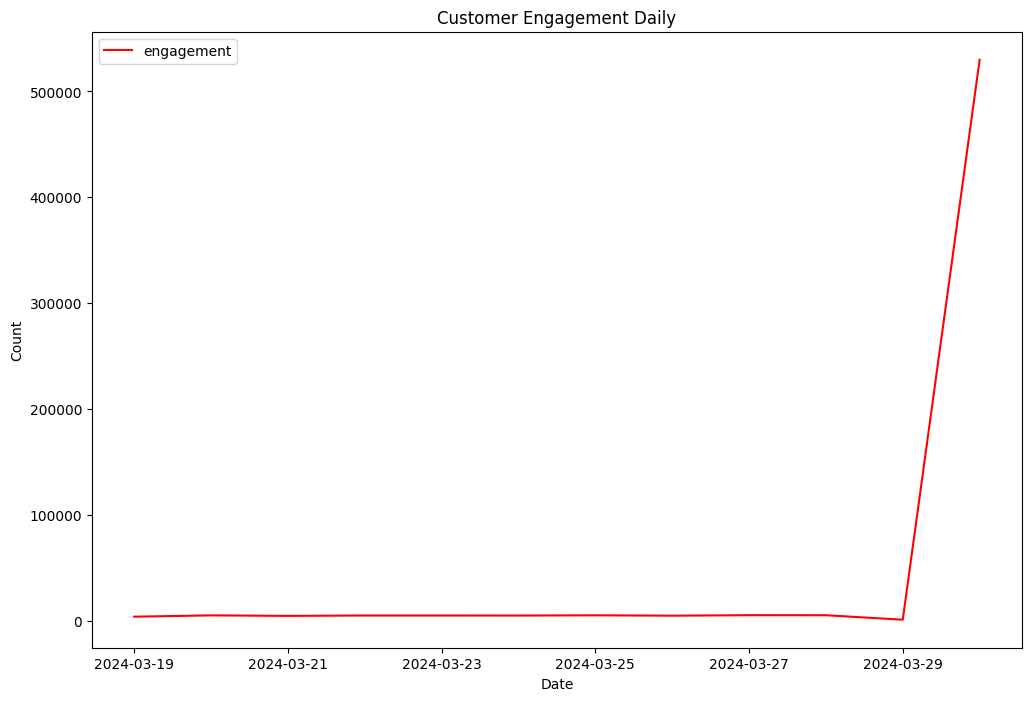

THE ENGAGEMENT WAS EVENLY SPREAD ACROSS DAYS TILL THE 29TH WHEN THERE WAS A SIGNIFICANT SURGE IN ENAGAGEMENT, THE REASON FORTHE SURGE IN ENGAGEMENT ON THE 29 SHOULD BE IDENTIFIED AND INTESIFIED FOR MORE ENGAGEMENT

In [81]:
df_time = df.copy()
df_time.set_index('event_timestamp', inplace=True)
plt.figure(figsize=(12,8))
daily_counts = df_time.resample('D').count()
plt.plot(daily_counts['event_id'],color='red', label='engagement')
plt.title('Customer Engagement Daily')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()
printmd('THE ENGAGEMENT WAS EVENLY SPREAD ACROSS DAYS TILL THE 29TH WHEN THERE WAS A SIGNIFICANT SURGE IN ENAGAGEMENT, THE REASON FORTHE SURGE IN ENGAGEMENT ON THE 29 SHOULD BE IDENTIFIED AND INTESIFIED FOR MORE ENGAGEMENT')


*CHECKING FOR THE EVENT TYPE WITH THE MOST ENGAGEMENT ON THE WEBSITE*

         event_type   count
0       add_to_cart  269335
1             visit  143154
2  remove_from_cart  134090
3          checkout   31741


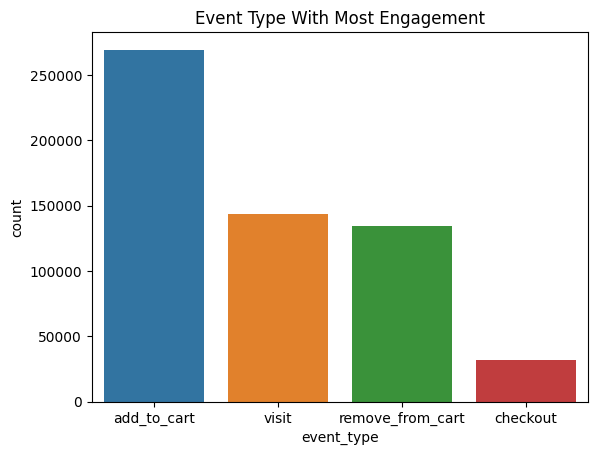

WE CAN SEE THAT "ADD TO CART" IS THE MOST ENGAGEMENT ON THE WEBSITE

In [83]:
df_event = df['event_type'].value_counts().reset_index()
print(df_event)
sns.barplot(data= df_event, x = 'event_type', y = 'count', hue='event_type')
plt.title('Event Type With Most Engagement')
plt.show()
printmd('WE CAN SEE THAT "ADD TO CART" IS THE MOST ENGAGEMENT ON THE WEBSITE')


*TOP 20 ENGAGERS OF THE WEBSITE*

   customer_id  count
0     eb7dcb88    372
1     ebcb2343    360
2     c391f179    360
3     a7d9058a    360
4     12e94262    360
5     be8ce4e3    360
6     e4431b51    360
7     ebcea232    360
8     d3cd2a61    348
9     5d4624cc    348
10    9ff854ce    348
11    23ea9949    348
12    a68a4174    348
13    e73af64f    348
14    82e02b41    348
15    12b8be6b    348
16    25ca6238    348
17    abc8403d    348
18    2625fe82    348
19    64a744f1    348


THE CUSTOMER  **eb7dcb88** VISITED THE SITE 372 TIMES FROM THE 2024-03-19 TO THE 2024-03-30 AND TOPS THE MOST INTERACTION WITH THE SITE WITHIN THAT TIME FRAME 

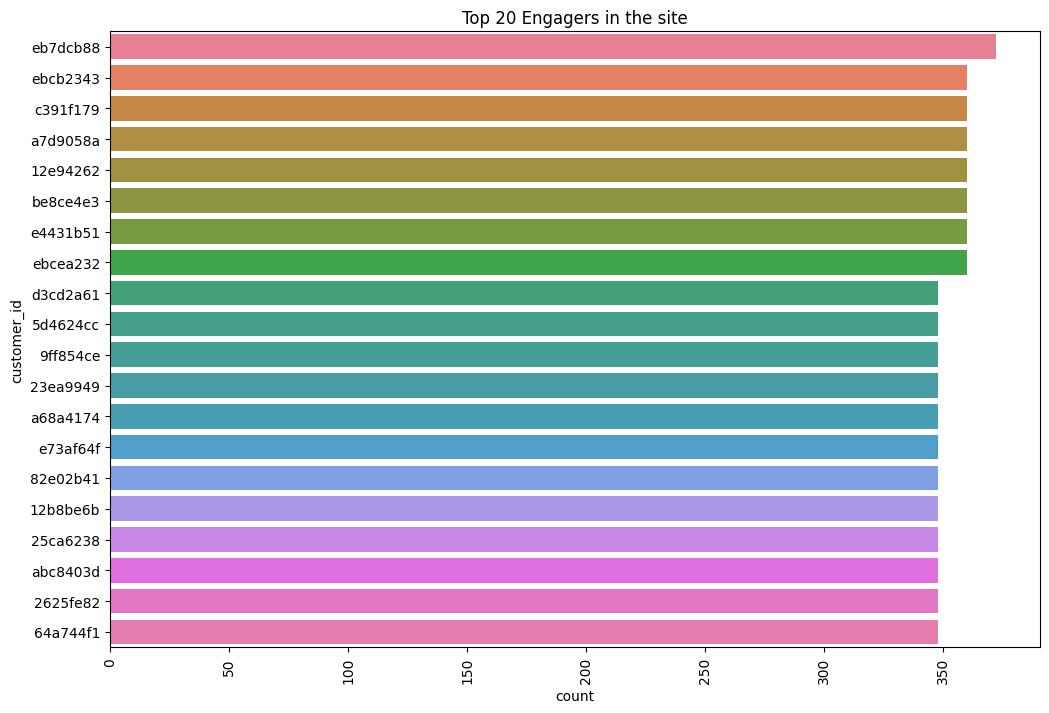

In [84]:
df_visit = df['customer_id'].value_counts().sort_values(ascending=False).reset_index()[:20]
print(df_visit)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_visit, y='customer_id', x='count', hue='customer_id')
plt.title('Top 20 Engagers in the site')
plt.xticks(rotation=90)

printmd(f'THE CUSTOMER  **{df_visit['customer_id'].iloc[0]}** VISITED THE SITE {df_visit['count'][0]} TIMES FROM THE {df_min} TO THE {df_max} AND TOPS THE MOST INTERACTION WITH THE SITE WITHIN THAT TIME FRAME ')


*PRODUCT INTERACTION ON THE WEBSITE*

                   product_name  count
0           Canon EOS R5 Camera  39715
1               Fitbit Charge 4  39268
2    Sony WH-1000XM4 Headphones  39162
3            Dell XPS 13 Laptop  39084
4            Samsung Galaxy S21  38997
5                     iPhone 13  38866
6       Microsoft Xbox Series X  38842
7             Adidas Ultraboost  38835
8              Nike Air Max 270  38782
9             Coca-Cola 12-Pack  38440
10            Apple AirPods Pro  38291
11  Samsung 55-Inch 4K Smart TV  38043
12       Starbucks Coffee Beans  37515
13           Sony PlayStation 5  37501
14              Nintendo Switch  36979


WE CAN SEE THE PRODUCT **Canon EOS R5 Camera** IS THE MOST ENGAGED PRODUCT ON THE WEBSITE WITH **39715** ENGAGEMENT WHILE **Nintendo Switch** HAS THE LOWEST ENGAGEMENT WITH **36979** ENGAGEMENT

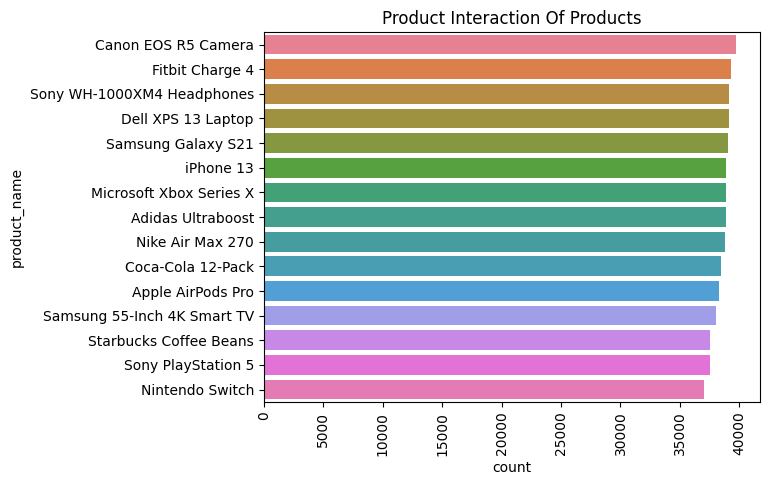

In [85]:
product_df = df['product_name'].value_counts().reset_index()
print(product_df)
sns.barplot(data=product_df, y='product_name', x='count', hue='product_name')
plt.title('Product Interaction Of Products')
plt.xticks(rotation=90);
printmd(f'WE CAN SEE THE PRODUCT **{product_df['product_name'].iloc[0]}** IS THE MOST ENGAGED PRODUCT ON THE WEBSITE WITH **{product_df['count'].iloc[0]}** ENGAGEMENT WHILE **{product_df['product_name'].iloc[14]}** HAS THE LOWEST ENGAGEMENT WITH **{product_df['count'].iloc[14]}** ENGAGEMENT')


*ORDER DURATION FOR SUCCESSFUL CHECKOUTS*

THE AVERAGE DURATION OF SUCCESSFUL CHECKOUTS IS 4.0, MORE SHOULD BE DONE TO BRING DOWN THE ORDER DURATION DAYS

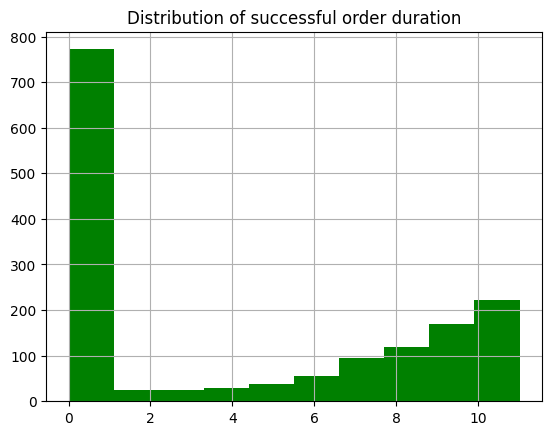

In [86]:
df_success = df[df['status']=='success']
df_grouped = df_success.groupby(['customer_id', 'order_id', 'event_type']).agg({'event_timestamp':'min'}).unstack()
df_grouped['order_duration'] = (df_grouped['event_timestamp', 'checkout'] - df_grouped['event_timestamp', 'visit']).dt.total_seconds() / (60 * 60 * 24)
df_grouped['order_duration'].hist(color='green')
plt.title('Distribution of successful order duration')
avg = df_grouped['order_duration'].mean().round(0)
avg
printmd(f'THE AVERAGE DURATION OF SUCCESSFUL CHECKOUTS IS {avg}, MORE SHOULD BE DONE TO BRING DOWN THE ORDER DURATION DAYS')


*ORDER DURATION FOR UNSSECCFUL / FAILED CHECKOUTS*

THE AVERAGE DURATION OF SUCCESSFUL CHECKOUTS IS 4.0, MORE SHOULD BE DONE TO BRING DOWN THE ORDER DURATION DAYS

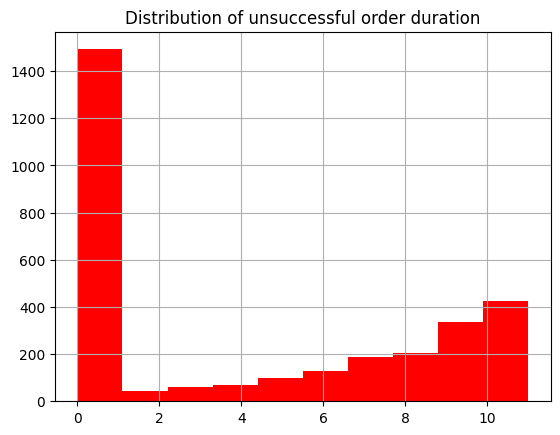

In [87]:
df_success = df[df['status']!='success']
df_grouped = df_success.groupby(['customer_id', 'order_id', 'event_type']).agg({'event_timestamp':'min'}).unstack()
df_grouped['order_duration'] = (df_grouped['event_timestamp', 'checkout'] - df_grouped['event_timestamp', 'visit']).dt.total_seconds() / (60 * 60 * 24)
df_grouped['order_duration'].hist(color='red')
plt.title('Distribution of unsuccessful order duration')
avg = df_grouped['order_duration'].mean().round(0)
avg
printmd(f'THE AVERAGE DURATION OF SUCCESSFUL CHECKOUTS IS {avg}, MORE SHOULD BE DONE TO BRING DOWN THE ORDER DURATION DAYS')


*PROPORTIONAL DISTRIBUTION OF STATUS OF ENGAGEMENT*

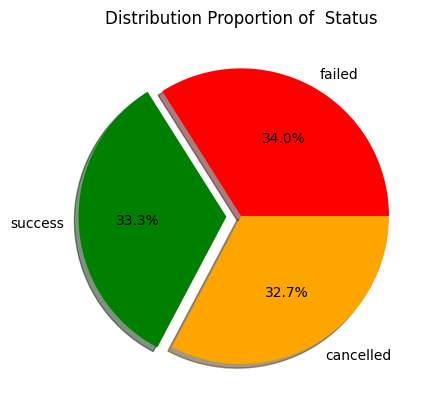

ONLY **33.3%** OF THE ORDERS WERE SUCCESSFUL, **34%** GOT FAILED...MORE SHOULD BE DONE TO STOP THE ORDERS FROM FAILING UPON COMPLETION

In [88]:
df_status = df['status'].value_counts()
explode = [0, 0.1, 0]
color = ['red', 'green', 'orange']
plt.pie(df_status, labels=df_status.index, autopct = '%1.1f%%', colors=color, explode=explode, shadow=True)
plt.title('Distribution Proportion of  Status')
plt.show()
printmd('ONLY **33.3%** OF THE ORDERS WERE SUCCESSFUL, **34%** GOT FAILED...MORE SHOULD BE DONE TO STOP THE ORDERS FROM FAILING UPON COMPLETION')


*REVENUE GENERATED FROM SUCCESFUL CHECKOUTS AND REVENUE LOST FROM UNSUCCESSFUL AND FAILED TRANSACTION*

      status  order_amount
0  cancelled   22114714.20
1     failed   22567306.30
2    success   22760347.19


THE REVENUE GENERATED FROM THE SUCCESSFUL COMPLETED ORDERS FROM THE SITE IS **$22,760,347**, WHILE THE REVENUE LOST FROM THE FAILED AND CANCELLED ORDERS IS **44,682,020**, LIKE I SAID EARLIER MORE SHOULD BE DONE TO REDUCED THE FAILED ORDER NUMBERS AS THEY ARE LOOSING DOUBLE THE REVENUE

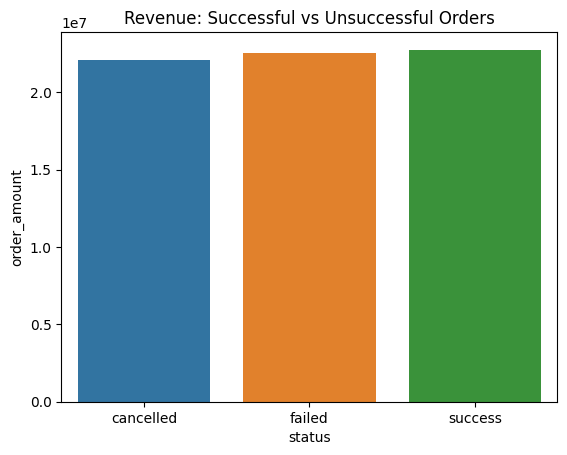

In [89]:
df_checkout = df[df['event_type']=='checkout']
order_amt = df_checkout.groupby('status')['order_amount'].sum().reset_index()
print(order_amt)
sns.barplot(data=order_amt, x='status', y='order_amount', hue='status')
plt.title('Revenue: Successful vs Unsuccessful Orders')
revenue = df_checkout.loc[df_checkout['status'] =='success', 'order_amount'].sum().round(2)
lost_revenue = df_checkout.loc[df_checkout['status'] !='success', 'order_amount'].sum().round(2)
formatted_revenue = '{:,}'.format(round(revenue))
formatted_lost_revenue = '{:,}'.format(round(lost_revenue))
printmd(f'THE REVENUE GENERATED FROM THE SUCCESSFUL COMPLETED ORDERS FROM THE SITE IS **${formatted_revenue}**, WHILE THE REVENUE LOST FROM THE FAILED AND CANCELLED ORDERS IS **{formatted_lost_revenue}**, LIKE I SAID EARLIER MORE SHOULD BE DONE TO REDUCED THE FAILED ORDER NUMBERS AS THEY ARE LOOSING DOUBLE THE REVENUE')


*TOP CUSTOMERS BY AMOUNT SPENT DURING VISITS*

     customer_id  order_amount
0       bb7fd0af      41417.41
1       df4cf418      41129.38
2       3c8e3261      41129.37
3       662af3bb      40451.58
4       90e76254      40249.41
...          ...           ...
1543    fd960258         29.95
1544    655402da         29.95
1545    2ea8d429         29.95
1546    8ef3e5a2         23.96
1547    af42c4ab         17.97

[1548 rows x 2 columns]


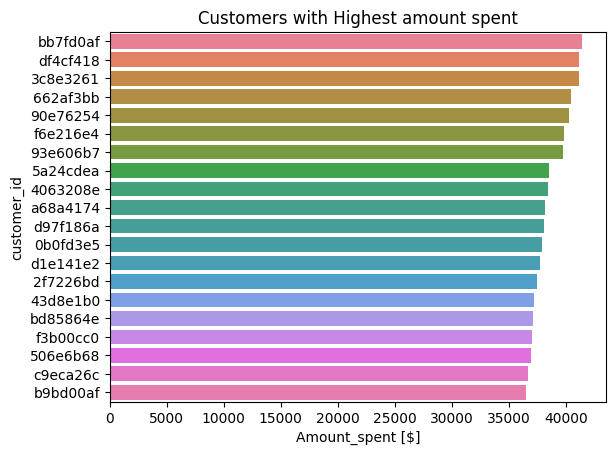

THE CUSTOMERS WITH THE TOP SPENDING AMOUNTS **bb7fd0af** WITH **$41,417.41** SPENT

In [193]:
df_checkout_success = df_checkout[df_checkout['status']=='success']
df_amount = df_checkout_success.groupby('customer_id')['order_amount'].sum().sort_values(ascending=False).reset_index()
print(df_amount)
sns.barplot(data=df_amount[:20], y='customer_id', x='order_amount', hue='customer_id')
plt.title('Customers with Highest amount spent')
plt.xlabel('Amount_spent [$]')
plt.show()
printmd(f'THE CUSTOMERS WITH THE TOP SPENDING AMOUNTS **bb7fd0af** WITH **$41,417.41** SPENT')


*CHECKING OUT THE TOP SPENDER IN THE DATASET...DESERVED TO BE LOOKED OUT*

In [91]:
top_customer = (df[(df['customer_id']=='bb7fd0af')&(df['event_type']=='checkout')])
print(top_customer['checked_out_at'].max())
print(top_customer['price'].max())
top_customer
printmd('THE TOP SPENDER WITH CUSTOMER ID **BB7FD0AF** HAILS FROM TAIWAN, HIS MOST RECENT PURCHASE WAS MADE ON **2024-03-30** AND HIS MOST SIGNIFICANT PURCHASE IS 5 UNITS OF **CANON EOS R5 CAMERA** AND SPENT ABOUT **$4000** ON THEM')


2024-03-30 04:09:13.742352
3999.99


THE TOP SPENDER WITH CUSTOMER ID **BB7FD0AF** HAILS FROM TAIWAN, HIS MOST RECENT PURCHASE WAS MADE ON **2024-03-30** AND HIS MOST SIGNIFICANT PURCHASE IS 5 UNITS OF **CANON EOS R5 CAMERA** AND SPENT ABOUT **$4000** ON THEM

In [92]:
df_checkout_success['order_amount'].describe()


count    10673.000000
mean      2132.516367
std       3422.459594
min          5.990000
25%        360.000000
50%        999.960000
75%       2499.950000
max      19999.950000
Name: order_amount, dtype: float64

THE AVERAGE AMOUNT SPENT ON THE WEBSITE IS **$2133.0** 

WHILE THE MINIMUM AMOUNT SPENT WAS **$6**

AND THE MAXIMUM AMOUNT SPENT WAS **$20000**

SHOWING THAT 75% OF THE ORDERS FALL BELOW **$2,500**

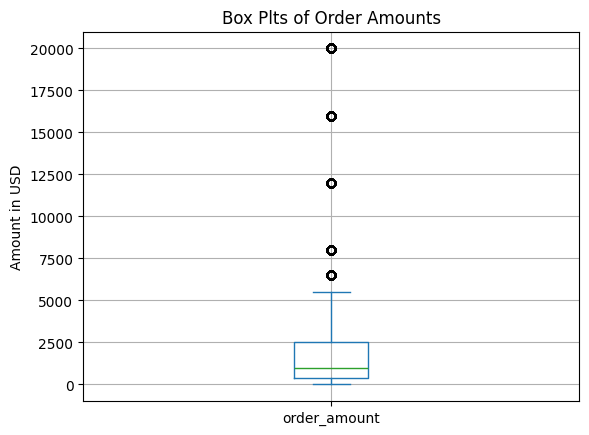

In [93]:
Avg_amt = df_checkout_success['order_amount'].mean().round()
min_amt = round(df_checkout_success['order_amount'].min())
max_amt = round(df_checkout_success['order_amount'].max())
df_checkout_success['order_amount'].plot(kind='box')
plt.title('Box Plts of Order Amounts')
plt.ylabel('Amount in USD')
plt.grid()
printmd(f'THE AVERAGE AMOUNT SPENT ON THE WEBSITE IS **${Avg_amt}** ')
printmd(f'WHILE THE MINIMUM AMOUNT SPENT WAS **${min_amt}**')
printmd(f'AND THE MAXIMUM AMOUNT SPENT WAS **${max_amt}**')
printmd(f'SHOWING THAT 75% OF THE ORDERS FALL BELOW **$2,500**')


*HISTOGRAM PLOT OF ORDER AMOUNT OF SUCCESSFUL CHECKOUT*

THIS SHOWS THAT DISTRIBUTION IS SKEWED TO THE RIGHT AS THERE ARE MORE SUCCESSFUL CUSTOMERS SPENDING SMALLER AMOUNT IN THE STORE...FOR A BIG STORE LIKE SHOPSMART A LEFT SKEWED DISTRIBUTION WOULD BE DESIRABLE, THAN BIG SPENDERS

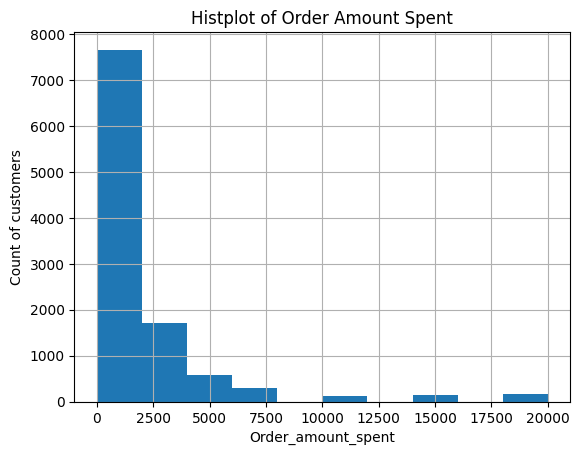

In [94]:
df_checkout_success['order_amount'].hist()
plt.xlabel('Order_amount_spent')
plt.ylabel('Count of customers')
plt.title('Histplot of Order Amount Spent')
printmd('THIS SHOWS THAT DISTRIBUTION IS SKEWED TO THE RIGHT AS THERE ARE MORE SUCCESSFUL CUSTOMERS SPENDING SMALLER AMOUNT IN THE STORE...FOR A BIG STORE LIKE SHOPSMART A LEFT SKEWED DISTRIBUTION WOULD BE DESIRABLE, THAN BIG SPENDERS')


*REVENUE GENERATED BY PRODUCTS*

                   product_name  order_amount
0           Canon EOS R5 Camera    8923977.69
1            Dell XPS 13 Laptop    2805378.42
2                     iPhone 13    2378178.38
3            Samsung Galaxy S21    1952078.31
4   Samsung 55-Inch 4K Smart TV    1674379.07
5       Microsoft Xbox Series X    1081978.36
6            Sony PlayStation 5    1055978.88
7    Sony WH-1000XM4 Headphones     745828.69
8               Nintendo Switch     567281.09
9             Apple AirPods Pro     544728.21
10            Adidas Ultraboost     392040.00
11              Fitbit Charge 4     318493.80
12             Nike Air Max 270     280128.45
13       Starbucks Coffee Beans      27175.08
14            Coca-Cola 12-Pack      12722.76


Text(0.5, 1.0, 'Amount Spent On Each Product')

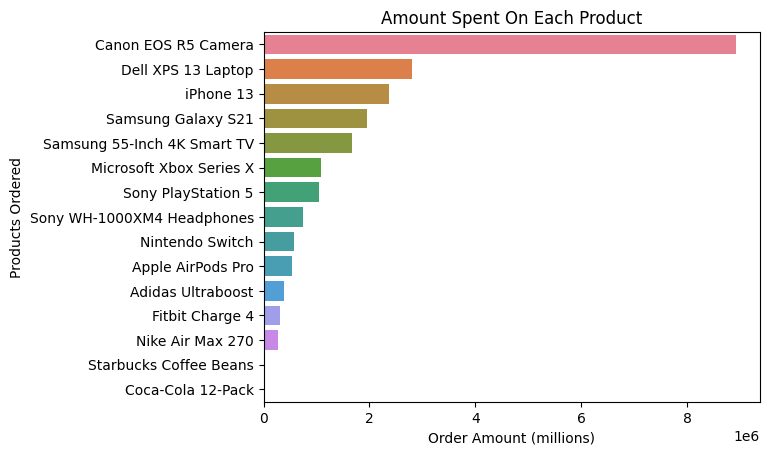

In [95]:
product_revenue = df_checkout_success.groupby('product_name')['order_amount'].sum().sort_values(ascending=False).reset_index()
print(product_revenue)
sns.barplot(data = product_revenue, y='product_name',x='order_amount', hue='product_name')
plt.xlabel('Order Amount (millions)')
plt.ylabel('Products Ordered')
plt.title('Amount Spent On Each Product')
#printmd(f'WE CAN SEE THAT THE PRODUCT WITH MOST ORDER AMOUNT IS THE **{product_revenue['product_name'].iloc[0]}** WHICH WAS SOLD COLLECTIVELY AT **${'{:,}'.format(round{product_revenue['order_amount'].iloc[0]})}** FOLLOWED BY **Dell XPS 13 Laptop**')


*PRICE OF EACH PRODUCT*

<Axes: xlabel='price', ylabel='product_name'>

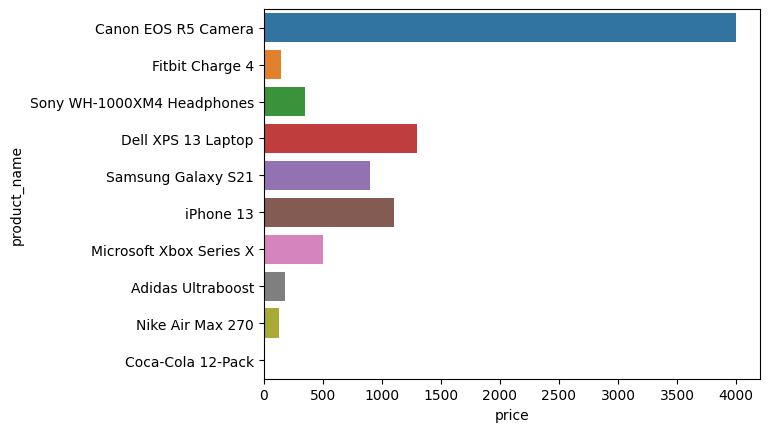

In [96]:
price_per_product = df.groupby('product_name')['price'].value_counts().sort_values(ascending=False)
price_per_product = pd.DataFrame(price_per_product)
sns.barplot(data=price_per_product.head(10), x='price', y='product_name', hue='product_name')


*COUNT OF PRODUCT ORDERED*

                   product_name  quantity
0           Canon EOS R5 Camera      2231
1             Apple AirPods Pro      2179
2             Adidas Ultraboost      2178
3            Samsung Galaxy S21      2169
4       Microsoft Xbox Series X      2164
5                     iPhone 13      2162
6            Dell XPS 13 Laptop      2158
7              Nike Air Max 270      2155
8    Sony WH-1000XM4 Headphones      2131
9             Coca-Cola 12-Pack      2124
10              Fitbit Charge 4      2124
11           Sony PlayStation 5      2112
12  Samsung 55-Inch 4K Smart TV      2093
13       Starbucks Coffee Beans      2092
14              Nintendo Switch      1891


WE CAN SEE THAT THE PRODUCT WITH MOST ORDERED THE MOST IS THE **Canon EOS R5 Camera** WHICH WAS SOLD COLLECTIVELY AT **2231** FOLLOWED BY **Apple AirPods Pro** THAT WAS ORDERED **2179** WHILE **Nintendo Switch** GENERATED THE LOWEST ORDER **1891**

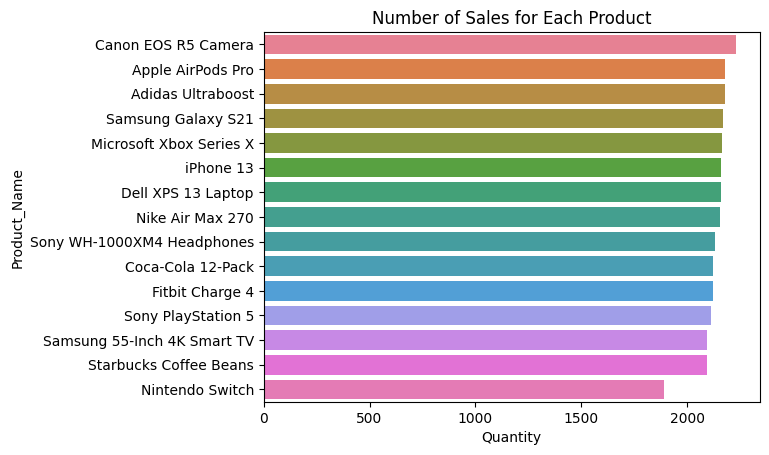

In [97]:
product_count = df_checkout_success.groupby('product_name')['quantity'].sum().sort_values(ascending=False).reset_index()
print(product_count)
sns.barplot(data=product_count, x ='quantity', y='product_name', hue='product_name')
plt.xlabel('Quantity')
plt.ylabel('Product_Name')
plt.title('Number of Sales for Each Product')
printmd(f'WE CAN SEE THAT THE PRODUCT WITH MOST ORDERED THE MOST IS THE **{product_count['product_name'].iloc[0]}** WHICH WAS SOLD COLLECTIVELY AT **{product_count['quantity'].iloc[0]}** FOLLOWED BY **{product_count['product_name'].iloc[1]}** THAT WAS ORDERED **{product_count['quantity'].iloc[1]}** WHILE **{product_count['product_name'].iloc[14]}** GENERATED THE LOWEST ORDER **{product_count['quantity'].iloc[14]}**')


*AMOUNT OF SALES GENERATED BY LOCATION*

                   location  order_amount
0                 Singapore     252274.67
1                     Korea     247149.42
2                 Mauritius     241841.76
3    Bosnia and Herzegovina     222098.53
4                    Rwanda     217881.10
..                      ...           ...
238                 Comoros      11169.89
239                 Uruguay       8513.70
240         Kyrgyz Republic       6697.77
241                Malaysia       2119.96
242                Slovenia        180.00

[243 rows x 2 columns]


WE CAN SEE THAT ABOUT 10 COUNTRIES MADE ORDER FOR ABOVE **200,000** WITH THE HIGHEST SPENDER **Singapore** WITH ABOUT **$252,275** WORTH OF ORDERED GOODS

 WHILE **Slovenia** HAS THE LOWEST ORDERED WORTH OF GOODS **$180.0**

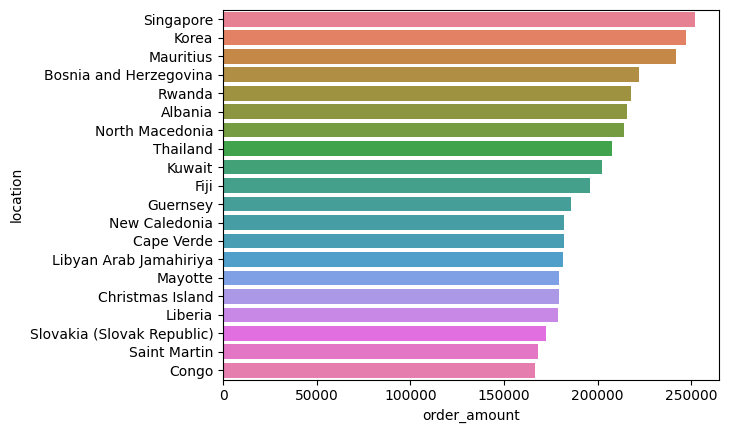

In [98]:
df_country = df_checkout_success.groupby('location')['order_amount'].sum().sort_values(ascending=False).reset_index()
print(df_country)
sns.barplot(data=df_country.head(20), y='location', x='order_amount', hue='location')
printmd(f'WE CAN SEE THAT ABOUT 10 COUNTRIES MADE ORDER FOR ABOVE **200,000** WITH THE HIGHEST SPENDER **{df_country['location'].iloc[0]}** WITH ABOUT **${'{:,}'.format(round(df_country['order_amount'].iloc[0]))}** WORTH OF ORDERED GOODS')
printmd(f' WHILE **{df_country['location'].iloc[242]}** HAS THE LOWEST ORDERED WORTH OF GOODS **${df_country['order_amount'].iloc[242]}**')


*COUNT OF ORDER BY EACH LOCATION*

                      location  quantity
0                    Mauritius       383
1                        Korea       371
2                      Albania       292
3       Bosnia and Herzegovina       292
4                    Singapore       290
..                         ...       ...
238            Kyrgyz Republic        23
239                    Comoros        11
240  Bouvet Island (Bouvetoya)        10
241                   Malaysia         8
242                   Slovenia         1

[243 rows x 2 columns]


THE LOCATION WITH THE HIGHEST COUNT OF OTHERED GOODS **Mauritius** WITH ABOUT **383** number OF ORDERED GOODS

 WHILE **Slovenia** HAS THE LOWEST ORDERED WORTH OF GOODS **1**

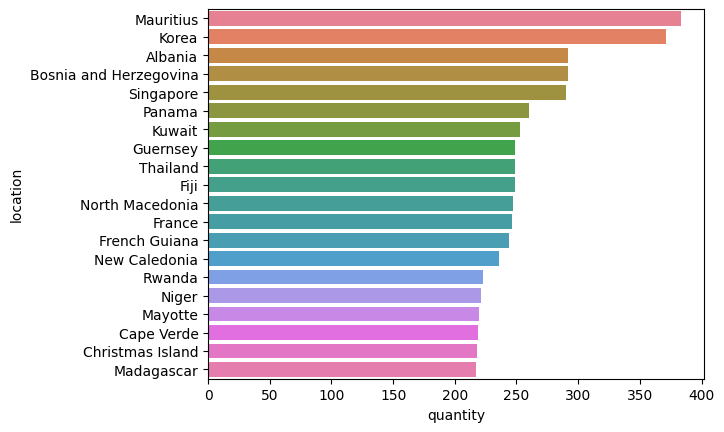

In [99]:
df_location = df_checkout_success.groupby('location')['quantity'].sum().sort_values(ascending=False).reset_index()
print(df_location)
sns.barplot(data=df_location.head(20), y='location', x='quantity', hue='location')

printmd(f'THE LOCATION WITH THE HIGHEST COUNT OF OTHERED GOODS **{df_location['location'].iloc[0]}** WITH ABOUT **{df_location['quantity'].iloc[0]}** number OF ORDERED GOODS')
printmd(f' WHILE **{df_location['location'].iloc[242]}** HAS THE LOWEST ORDERED WORTH OF GOODS **{df_location['quantity'].iloc[242]}**')


*OVERALL SUCCESSFUL INTERACTION WITH THE SITE*

            location  count
0              Korea   6997
1          Argentina   4507
2          Mauritius   4414
3             Jersey   4130
4             Panama   3936
5      French Guiana   3851
6           Guernsey   3804
7          Guatemala   3731
8            Albania   3721
9        Philippines   3675
10              Mali   3670
11             Congo   3642
12           Finland   3615
13        Cape Verde   3509
14  Christmas Island   3471
location    Afghanistan
count               734
dtype: object
location    Zimbabwe
count           6997
dtype: object


**KOREA** HAS THE HIGHEST NUMBER OF INTERACTIONS WITH THE SITE CLOSE TO **7000** INTERACTIONS WHILE **AFGHANISTAN** HAS THE LOWEST INTERACTION WITH **734** INTERACTION

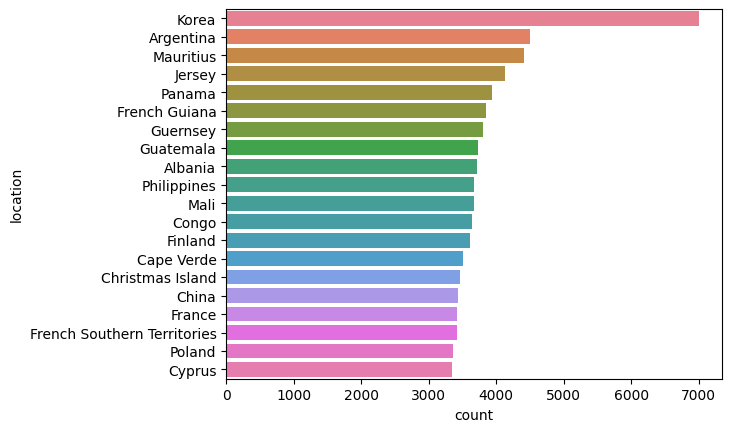

In [262]:
df_location = df['location'].value_counts().sort_values(ascending=False).reset_index()
print(df_location.head(15))
min_loc = df_location.min()
max_loc = df_location.max()
print(min_loc)
print(max_loc)
sns.barplot(data = df_location.head(20), x='count', y='location', hue='location')
printmd('**KOREA** HAS THE HIGHEST NUMBER OF INTERACTIONS WITH THE SITE CLOSE TO **7000** INTERACTIONS WHILE **AFGHANISTAN** HAS THE LOWEST INTERACTION WITH **734** INTERACTION')


*LOCATION REVENUE STATISTICS*

THE AVERAGE ORDER_AMOUNT PER LOCATION IS **$93,664**

THE MINIMUM ORDER AMOUNT PER LOCATION IS **$180**

THE MAXIMUN ORDER_AMOUNT PER LOCATION IS **$252,275**

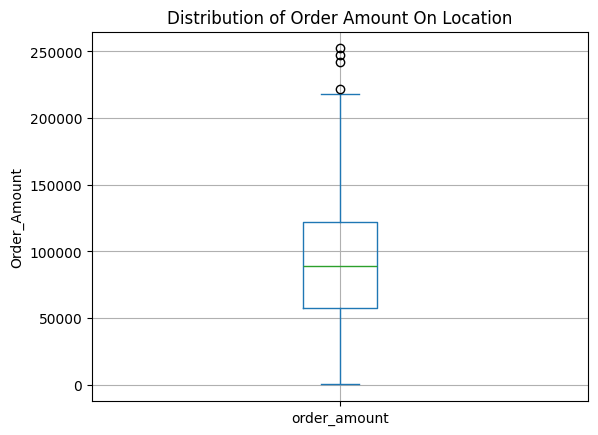

In [101]:
avg_loc = round(df_country['order_amount'].mean())
min_loc = round(df_country['order_amount'].min())
max_loc = round(df_country['order_amount'].max())

df_country['order_amount'].plot(kind='box')
plt.grid()
plt.ylabel('Order_Amount')
plt.title('Distribution of Order Amount On Location')
printmd(f'THE AVERAGE ORDER_AMOUNT PER LOCATION IS **${'{:,}'.format(avg_loc)}**')
printmd(f'THE MINIMUM ORDER AMOUNT PER LOCATION IS **${min_loc}**')
printmd(f'THE MAXIMUN ORDER_AMOUNT PER LOCATION IS **${'{:,}'.format(max_loc)}**')


THIS SHOWS THAT DISTRIBUTION IS SKEWED TO THE RIGHT AS THERE ARE MORE COUNTRIES SPENDING SMALLER AMOUNT IN THE STORE..ONLY A SMALL AMOUNT OF COUNTRIES SPEND BIG...FOR A BIG STORE LIKE SHOPSMART A LEFT SKEWED DISTRIBUTION WOULD BE DESIRABLE

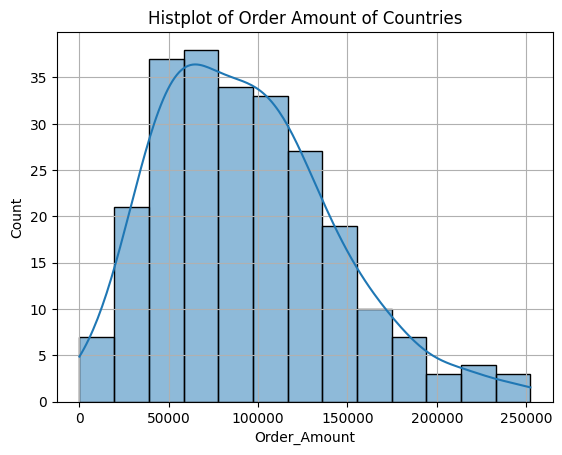

In [102]:
sns.histplot(df_country['order_amount'],kde=True)
plt.xlabel('Order_Amount')
plt.ylabel('Count')
plt.title('Histplot of Order Amount of Countries')
plt.grid()
printmd('THIS SHOWS THAT DISTRIBUTION IS SKEWED TO THE RIGHT AS THERE ARE MORE COUNTRIES SPENDING SMALLER AMOUNT IN THE STORE..ONLY A SMALL AMOUNT OF COUNTRIES SPEND BIG...FOR A BIG STORE LIKE SHOPSMART A LEFT SKEWED DISTRIBUTION WOULD BE DESIRABLE')


*TOP SELLING PRODUCTS BY EACH LOCATION*

In [103]:
top_prod_location = df_checkout_success.groupby(['location', 'product_name'])['order_amount'].sum().reset_index()
loc_max_sales = top_prod_location.sort_values('order_amount', ascending=False).drop_duplicates('location', keep='first')

print(loc_max_sales.shape)
printmd('I DISCOVERED THAT **CANON E0S R5 CAMERA** IS THE MOST ORDERED ITEM IN MOST COUNTRY...I THINK THE PRICE INFLATED THE AMOUNT FOR EACH COUNTRY AS 1 OF IT COST ALMOST **$4000**')
loc_max_sales.head(20)


(243, 3)


I DISCOVERED THAT **CANON E0S R5 CAMERA** IS THE MOST ORDERED ITEM IN MOST COUNTRY...I THINK THE PRICE INFLATED THE AMOUNT FOR EACH COUNTRY AS 1 OF IT COST ALMOST **$4000**

,location,product_name,order_amount
2559,Rwanda,Canon EOS R5 Camera,115999.71
368,Bosnia and Herzegovina,Canon EOS R5 Camera,111999.72
1730,Libyan Arab Jamahiriya,Canon EOS R5 Camera,111999.72
2782,Singapore,Canon EOS R5 Camera,111999.72
2272,North Macedonia,Canon EOS R5 Camera,107999.73
2797,Slovakia (Slovak Republic),Canon EOS R5 Camera,95999.76
988,Fiji,Canon EOS R5 Camera,95999.76
1635,Kuwait,Canon EOS R5 Camera,91999.77
1249,Guernsey,Canon EOS R5 Camera,91999.77
17,Albania,Canon EOS R5 Camera,87999.78


*ABOUT 210 COUNTRIES ORDERED THE **CANON EOS CAMERA** MOST**

In [104]:
canon_eos_countries= loc_max_sales[loc_max_sales['product_name'] =='Canon EOS R5 Camera']
canon_eos_countries['location'].count()


210

# CUSTOMER SEGMENTATION #

*SEGMENTATION OF CUSTOMERS BASED ON CUSTOMER BEHAVIOUR WOULD ASSIST IN CUSTOMER AFTER SALES SUPPORT IN ORDER TO REDUCE CHURN RATE AMONGST CUSTOMERS..LETS BUILD AN UNSUPERVISED KMEANS MODEL TO SEGMENT OUR CUSTOMERS*

In [223]:
numerical_columns = [col for col in df_model.columns if col not in ['location', 'status']]
numerical_df = df_model[numerical_columns]

categorical_columns = ['location', 'status']
categorical_df = df_model[categorical_columns]


# SCALING #

In [225]:
#df_model.drop(columns='order_duration_hours', axis=1, inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(df_model)
scaled_df = pd.DataFrame(data=X, columns = df_model.columns)
scaled_df


,location,order_count,quantity,order_amount,order_duration,status
0,0.308392,0.330535,0.304039,-0.439554,-0.931069,-0.712887
1,-1.139190,-1.790667,-1.677709,-0.272000,0.810723,1.402747
2,-1.569165,-1.184609,-1.205864,-1.164952,-0.931386,-0.712887
3,-0.666218,-0.881580,-0.734020,1.093794,0.608565,-0.712887
4,0.308392,0.330535,0.304039,-0.407683,1.285541,-0.712887
...,...,...,...,...,...,...
4589,-0.537225,-0.578552,-1.488971,-0.930246,-0.930435,-0.712887
4590,0.308392,-0.275523,0.115301,-0.308748,0.883602,-0.712887
4591,1.182674,-1.487638,-1.677709,-1.448055,-0.929960,-0.712887
4592,1.526654,0.936593,0.587146,0.222132,1.523663,1.402747


# DIMENSIONALITY REDUCTION #

*DIMENSIONALITY REDUCTION USING PCA*

4


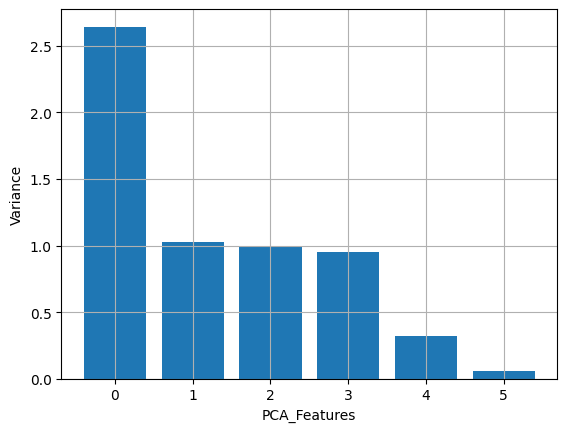

In [226]:
pca = PCA()
pca.fit(scaled_df)
features = range(pca.n_components_)
variance = pca.explained_variance_
plt.bar(features, variance)
plt.xlabel('PCA_Features')
plt.ylabel('Variance')
plt.grid()
variance_ratio = pca.explained_variance_ratio_
variance_ratio
n_components = sum(variance_ratio>0.1)
print(n_components)


In [ ]:
# fitting the model
pca = PCA(n_components)
customer_pca = pca.fit_transform(df_model)
print(customer_pca.shape)
customer_pca


(4594, 4)


array([[-4.48731706e+03, -5.75891484e+03,  2.73988661e+01,
         6.93114168e+00],
       [-2.54291904e+03,  5.18699366e+03, -7.85213546e+01,
        -1.62490758e+01],
       [-1.16337496e+04, -5.56987066e+03, -9.68603984e+01,
        -3.64622041e+00],
       ...,
       [-1.44223216e+04, -5.48624675e+03,  9.77679188e+01,
        -6.44062554e+00],
       [ 2.44549473e+03,  9.55527545e+03,  1.01523497e+02,
         5.17624998e+00],
       [-1.12098270e+04,  8.41479381e+03, -1.02169572e+02,
        -1.66902041e+00]])

*CLUSTERING WITH KMEANS*

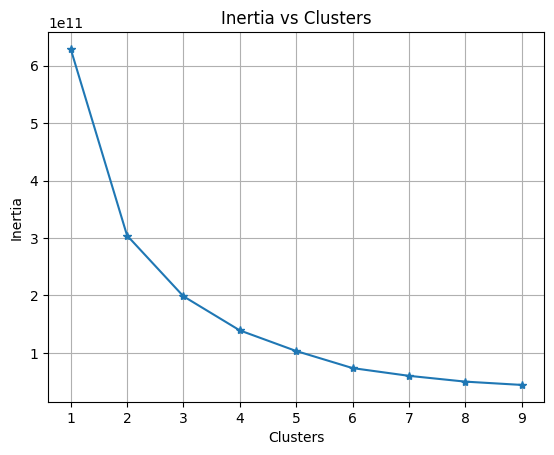

In [ ]:
#using kmeans clustering to obtain inertia vs clusters
n_clusters = range(1, 10)
inertia = []
for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(customer_pca)
    inertia.append(model.inertia_)
plt.plot(n_clusters,inertia, marker='*' )
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Clusters')
plt.grid()


*3D GRAPHICAL REPRESENTATION OF PREDICTED CUSTOMERS SEGMENTATION WITH COLORS SINALING DIFFERENT GROUPS*

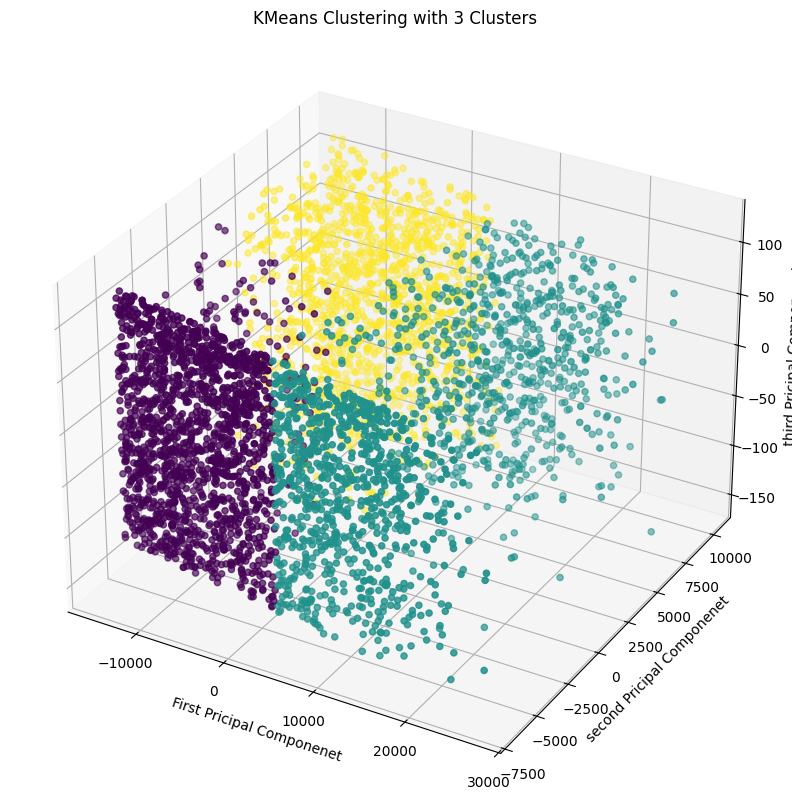

In [229]:
n_clusters=3
Kmeans = KMeans(n_clusters, random_state=42)
Kmeans.fit(customer_pca)
labels=Kmeans.labels_
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(customer_pca[:, 0], customer_pca[:, 1], customer_pca[:, 2], c=labels, cmap='viridis')
plt.xlabel('First Pricipal Componenet')
plt.ylabel('second Pricipal Componenet')
ax.set_zlabel('third Pricipal Componenet')
plt.title('KMeans Clustering with 3 Clusters')
plt.show()


*CUSTOMER LABELS*

In [230]:
df_processed['labels'] = labels
df_processed


,customer_id,location,order_count,quantity,order_amount,order_duration,status,labels
165,0d39f705,El Salvador,8,24,10348.72,9.0,0,0
143,1a6649ba,Zambia,1,3,11999.97,11003.0,1,2
372,1e8483f6,Turks and Caicos Islands,3,8,3199.92,7.0,0,0
2394,ca6c792f,Sudan,4,13,25459.89,9727.0,0,1
1686,8bf84c51,El Salvador,8,24,10662.81,14000.0,0,2
...,...,...,...,...,...,...,...,...
2895,f33b1308,Bermuda,5,5,5512.95,13.0,0,0
2763,e99ba801,El Salvador,6,22,11637.82,11463.0,0,2
905,4823e63d,Cyprus,2,3,409.93,16.0,0,0
934,95960342,Korea,10,27,16869.65,15503.0,1,2


*TOP VALUED CUSTOMER*

In [256]:
top_valued_customer = df_amount["customer_id"].head(20).to_list()
top_valued_customer = df_processed[df_processed['customer_id'].isin(top_valued_customer)]
printmd(f'THE TOP CUSTOMERS RANGE IS BETWEEN CUSTOMERS WHOM ORDERS RANGES FROM ')
top_valued_customer


THE TOP CUSTOMERS RANGE IS BETWEEN CUSTOMERS WHOM ORDERS RANGES FROM 

,customer_id,location,order_count,quantity,order_amount,order_duration,status,labels
1274,d1e141e2,Saint Helena,9,33,37729.71,9982.0,1,1
1311,d97f186a,Finland,12,41,38082.40,9.0,1,1
900,90e76254,Korea,12,44,40249.41,8858.0,1,1
1348,df4cf418,Rwanda,11,43,41129.38,15057.0,1,1
918,93e606b7,Kuwait,10,37,39751.63,9.0,1,1
374,3c8e3261,Switzerland,12,48,41129.37,12574.0,1,1
285,2f7226bd,Argentina,11,43,37463.45,16.0,1,1
1470,f3b00cc0,Gibraltar,11,35,37043.63,3.0,1,1
1145,b9bd00af,Cape Verde,9,31,36479.56,15061.0,1,1
1035,a68a4174,Armenia,12,40,38123.49,12639.0,1,1


*THE TOP CUSTOMER IN THE DATASET BELONGED TO THE TOP VALUED CUSTOMER GROUP*

In [261]:
df_processed[(df_processed['status'] == 1)&(df_processed['labels']==1)&(df_processed['customer_id']=='bb7fd0af')]



,customer_id,location,order_count,quantity,order_amount,order_duration,status,labels
1157,bb7fd0af,Taiwan,12,43,41417.41,13573.0,1,1


# INSIGHTS #

*UNIFORM DISTRIBUTION OF ENGAGEMENT*

 
 there was uniform distribution of engagement until the spike in activities which started on the 29th, investigate the cause of the spike and optimiza the actions which led to it.

 *TOP PERFORMING PRODUCT*


 The **Cannon E0S R5** comes out as the most performing product in the data, the product drew about **39,715** interactions and about **$9,923,978(M)** revenue was made and about 2,231 units were sold. in opposite the lowest performing product via interaction was Nintendo Switch that drew about **36,979** interactions and made aout **$567,281k** in revenue and **1,891** units were sold, with the lowest performing product via revenue is Coca-Cola 12-Pack which made a revenue of **$12,722.7k** and though it had more interactions **38,440** and had about **2,124** units sold...marketers should capitalize on the popularity of the Cannon E0S Camera to boast revenue.

 
*AVERAGE INTERAACTION DURATION*


On average, customers spend about 4 days interacting with the site, this insights should be used to optimize and encourage user experience within the site


*PERCENTAGES OF FAILED/SUCCESSFULORDERS AND SUCCESSFUL ORDERS*


About **33.3%** oforders made were successful while about **66.7%** were either cancelled or the transfer failed...more shoukd e done to reduced the amount of failed transfer and enhance user experience to reduce the amount of cancelled transfers


*LOW VALUED AND HIGH VALUED CUSTOMERS*


The customers in the label[1] group are customers of top values, theses customers place frequent orders from the shop and the shop have made a huge sgum of money from each and every one of the and the top spender is the customer id['bb7fd0af'] that has spent about **$41,417.4** on orders.
Top_Valued_Customers = 1
Mid_Valued_Customers = 2
Low_Valued_Customers = 0

More advertisement and campaign should be done to reach out to the top customers on new products as soo as they hit the market to generate more revenue


*REVENUE AND LOSSES*
About **$22,760,347** Revenue was made from the successful orders while about **$44,682**,020 close to the double of revenue was made from the failed/cancelled checkouts...handling the issues of failed transfers can't be overemphasied enough....mre should be done to reduced the numbers immediately.


*REVENUE BY LOCATION*
The country that generated the most revenue was **SINGAPORE** with the generated amount of **$252,274.67** while the lowest country **SLOVENIA** generated the lowest revenue about **$180.00**


*INTERACTIONS BY LOCATION*

The country with the most ineteractions with the site is Korea with **6,997** interactions and the country with the least interaction is Christmas Island with **3,471** interactions.....more campaign on newly improved products should be launched to the country of korea and other beneat it to boast revenue